# Import and Install Dependencies

In [2]:
!pip install tensorflow==2.4.1 opencv-python mediapipe sklearn matplotlib

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import os
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [5]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION
    image.flags.writeable = False  #Image is no longer writeable
    results = model.process(image) # Make prediction
    image.flags.writeable = True   #Image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION
    return image, results

In [30]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw right hand connections

In [36]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [20]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [19]:
mp_drawing.draw_landmarks??

In [57]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #Read feed
        ret, frame =cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        #Show to screen
        cv2.imshow('OpenCV Feed', image)

        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
len(results.left_hand_landmarks.landmark)

21

In [31]:
results

mediapipe.python.solution_base.SolutionOutputs

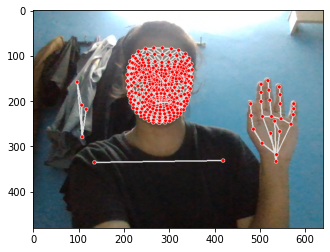

In [33]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [52]:
len(results.pose_landmarks.landmark)

33

In [49]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [51]:
len(pose)

33

In [69]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [74]:
len(results.face_landmarks.landmark)*3

1404

In [75]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [76]:
result_test = extract_keypoints(results)

In [79]:
result_test

array([ 0.55892742,  0.54147881, -0.774104  , ...,  0.        ,
        0.        ,  0.        ])

In [86]:
468*3+33*4+21*3+21*3

1662

In [93]:
result_test = extract_keypoints(results)
np.save('0', result_test)

In [94]:
np.load('0.npy')

array([ 0.58887255,  0.49202979, -1.15802693, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [87]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [88]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [89]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [95]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows() 

# 6. Preprocess Data and Create Labels and Features

In [124]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [125]:
label_map = {label:num for num, label in enumerate(actions)}

In [126]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [127]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [128]:
np.array(sequences).shape

(90, 30, 1662)

In [129]:
np.array(labels).shape

(90,)

In [130]:
X = np.array(sequences)

In [131]:
X.shape

(90, 30, 1662)

In [132]:
y = to_categorical(labels).astype(int)

In [105]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [134]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [136]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [137]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [138]:
res = [.7, 0.2, 0.1]

In [139]:
actions[np.argmax(res)]

'hello'

In [140]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [141]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 498ms/step - loss: 6.3324 - categorical_accuracy: 0.3424
Epoch 2/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.7220 - categorical_accuracy: 0.3268
Epoch 3/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.4651 - categorical_accuracy: 0.3112
Epoch 4/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0830 - categorical_accuracy: 0.3698
Epoch 5/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.1122 - categorical_accuracy: 0.3504
Epoch 6/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.2583 - categorical_accuracy: 0.4227
Epoch 7/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1454 - categorical_accuracy: 0.2466
Epoch 8/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.1501 - categorical_accuracy: 0.3073
Epoch 9/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.1014 - categorical_accuracy: 0.3091


3/3 [==============================] - 0s 60ms/step - loss: 1.0962 - categorical_accuracy: 0.3620
Epoch 75/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1013 - categorical_accuracy: 0.2995
Epoch 76/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0961 - categorical_accuracy: 0.3815
Epoch 77/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0987 - categorical_accuracy: 0.3347
Epoch 78/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0991 - categorical_accuracy: 0.3347
Epoch 79/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3425
Epoch 80/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1002 - categorical_accuracy: 0.3112
Epoch 81/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0947 - categorical_accuracy: 0.4050
Epoch 82/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0999 - categorical_accuracy: 0.3229
Epoch 

3/3 [==============================] - 0s 65ms/step - loss: 1.0408 - categorical_accuracy: 0.3777
Epoch 147/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0493 - categorical_accuracy: 0.4090
Epoch 148/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0559 - categorical_accuracy: 0.3777
Epoch 149/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0373 - categorical_accuracy: 0.4168
Epoch 150/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0264 - categorical_accuracy: 0.3855
Epoch 151/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0478 - categorical_accuracy: 0.3972
Epoch 152/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0518 - categorical_accuracy: 0.4011
Epoch 153/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0393 - categorical_accuracy: 0.4051
Epoch 154/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0317 - categorical_accuracy: 0.440

3/3 [==============================] - 0s 70ms/step - loss: 1.0975 - categorical_accuracy: 0.3307
Epoch 219/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0961 - categorical_accuracy: 0.3268
Epoch 220/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0936 - categorical_accuracy: 0.3347
Epoch 221/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0917 - categorical_accuracy: 0.3562
Epoch 222/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0957 - categorical_accuracy: 0.3327
Epoch 223/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0897 - categorical_accuracy: 0.4089
Epoch 224/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0880 - categorical_accuracy: 0.3484
Epoch 225/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0850 - categorical_accuracy: 0.3796
Epoch 226/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0800 - categorical_accuracy: 0.418

3/3 [==============================] - 0s 81ms/step - loss: 1.1042 - categorical_accuracy: 0.3347
Epoch 291/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.1011 - categorical_accuracy: 0.3425
Epoch 292/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1001 - categorical_accuracy: 0.3386
Epoch 293/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.1038 - categorical_accuracy: 0.3425
Epoch 294/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.1016 - categorical_accuracy: 0.3307
Epoch 295/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0988 - categorical_accuracy: 0.3581
Epoch 296/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0924 - categorical_accuracy: 0.3737
Epoch 297/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.1058 - categorical_accuracy: 0.3347
Epoch 298/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0956 - categorical_accuracy: 0.350

3/3 [==============================] - 0s 68ms/step - loss: 0.6609 - categorical_accuracy: 0.6654
Epoch 363/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.6210 - categorical_accuracy: 0.7201
Epoch 364/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.5964 - categorical_accuracy: 0.7045
Epoch 365/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.5960 - categorical_accuracy: 0.7123
Epoch 366/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.6546 - categorical_accuracy: 0.6576
Epoch 367/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6359 - categorical_accuracy: 0.6498
Epoch 368/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.6126 - categorical_accuracy: 0.7201
Epoch 369/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.5799 - categorical_accuracy: 0.6771
Epoch 370/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.5799 - categorical_accuracy: 0.70

3/3 [==============================] - 0s 67ms/step - loss: 1.0910 - categorical_accuracy: 0.3698
Epoch 435/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0943 - categorical_accuracy: 0.3288
Epoch 436/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0963 - categorical_accuracy: 0.3620
Epoch 437/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0933 - categorical_accuracy: 0.3718
Epoch 438/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0948 - categorical_accuracy: 0.3425
Epoch 439/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0937 - categorical_accuracy: 0.3425
Epoch 440/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0955 - categorical_accuracy: 0.3307
Epoch 441/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0958 - categorical_accuracy: 0.3464
Epoch 442/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0924 - categorical_accuracy: 0.332

3/3 [==============================] - 0s 76ms/step - loss: 1.0456 - categorical_accuracy: 0.3933
Epoch 507/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0606 - categorical_accuracy: 0.3816
Epoch 508/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0553 - categorical_accuracy: 0.3366
Epoch 509/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0620 - categorical_accuracy: 0.3191
Epoch 510/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0408 - categorical_accuracy: 0.3268
Epoch 511/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0446 - categorical_accuracy: 0.4089
Epoch 512/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0474 - categorical_accuracy: 0.5087
Epoch 513/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0540 - categorical_accuracy: 0.3855
Epoch 514/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0580 - categorical_accuracy: 0.373

3/3 [==============================] - 0s 67ms/step - loss: 1.0356 - categorical_accuracy: 0.4324
Epoch 579/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0495 - categorical_accuracy: 0.3835
Epoch 580/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0545 - categorical_accuracy: 0.3699
Epoch 581/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0302 - categorical_accuracy: 0.4090
Epoch 582/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0467 - categorical_accuracy: 0.3777
Epoch 583/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0554 - categorical_accuracy: 0.3621
Epoch 584/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0555 - categorical_accuracy: 0.3777
Epoch 585/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0495 - categorical_accuracy: 0.3855
Epoch 586/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0488 - categorical_accuracy: 0.389

3/3 [==============================] - 0s 75ms/step - loss: 0.9364 - categorical_accuracy: 0.5245
Epoch 651/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9013 - categorical_accuracy: 0.5166
Epoch 652/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.2095 - categorical_accuracy: 0.3640
Epoch 653/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.3714 - categorical_accuracy: 0.3366
Epoch 654/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.2951 - categorical_accuracy: 0.3562
Epoch 655/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.1392 - categorical_accuracy: 0.4108
Epoch 656/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.1393 - categorical_accuracy: 0.3523
Epoch 657/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0648 - categorical_accuracy: 0.3757
Epoch 658/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0548 - categorical_accuracy: 0.36

3/3 [==============================] - 0s 89ms/step - loss: 1.1600 - categorical_accuracy: 0.3600
Epoch 723/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.1707 - categorical_accuracy: 0.3307
Epoch 724/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.1750 - categorical_accuracy: 0.3229
Epoch 725/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.1657 - categorical_accuracy: 0.3268
Epoch 726/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.1164 - categorical_accuracy: 0.3562
Epoch 727/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0728 - categorical_accuracy: 0.3757
Epoch 728/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0641 - categorical_accuracy: 0.3757
Epoch 729/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0817 - categorical_accuracy: 0.3347
Epoch 730/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0460 - categorical_accuracy: 0.377

3/3 [==============================] - 0s 64ms/step - loss: 1.0645 - categorical_accuracy: 0.3543
Epoch 795/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0440 - categorical_accuracy: 0.4207
Epoch 796/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0263 - categorical_accuracy: 0.4051
Epoch 797/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0520 - categorical_accuracy: 0.4011
Epoch 798/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0319 - categorical_accuracy: 0.4051
Epoch 799/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0626 - categorical_accuracy: 0.3738
Epoch 800/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0341 - categorical_accuracy: 0.3855
Epoch 801/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0310 - categorical_accuracy: 0.3816
Epoch 802/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0619 - categorical_accuracy: 0.358

3/3 [==============================] - 0s 58ms/step - loss: 1.0419 - categorical_accuracy: 0.4051
Epoch 867/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0397 - categorical_accuracy: 0.3543
Epoch 868/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0695 - categorical_accuracy: 0.3543
Epoch 869/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0283 - categorical_accuracy: 0.3933
Epoch 870/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0421 - categorical_accuracy: 0.3816
Epoch 871/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0503 - categorical_accuracy: 0.3816
Epoch 872/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0677 - categorical_accuracy: 0.3621
Epoch 873/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0334 - categorical_accuracy: 0.4246
Epoch 874/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0447 - categorical_accuracy: 0.377

3/3 [==============================] - 0s 75ms/step - loss: 1.0579 - categorical_accuracy: 0.3543
Epoch 939/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0489 - categorical_accuracy: 0.3777
Epoch 940/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0417 - categorical_accuracy: 0.4129
Epoch 941/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0331 - categorical_accuracy: 0.4090
Epoch 942/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0540 - categorical_accuracy: 0.3816
Epoch 943/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0431 - categorical_accuracy: 0.4090
Epoch 944/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0587 - categorical_accuracy: 0.3855
Epoch 945/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0488 - categorical_accuracy: 0.3660
Epoch 946/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0411 - categorical_accuracy: 0.385

3/3 [==============================] - 0s 68ms/step - loss: 1.0611 - categorical_accuracy: 0.3777
Epoch 1011/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0506 - categorical_accuracy: 0.3738
Epoch 1012/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0416 - categorical_accuracy: 0.3582
Epoch 1013/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0353 - categorical_accuracy: 0.4168
Epoch 1014/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0438 - categorical_accuracy: 0.3582
Epoch 1015/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0356 - categorical_accuracy: 0.3738
Epoch 1016/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0427 - categorical_accuracy: 0.3777
Epoch 1017/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0362 - categorical_accuracy: 0.4324
Epoch 1018/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0467 - categorical_accurac

Epoch 1082/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0338 - categorical_accuracy: 0.4246
Epoch 1083/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0490 - categorical_accuracy: 0.3621
Epoch 1084/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0511 - categorical_accuracy: 0.3816
Epoch 1085/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0518 - categorical_accuracy: 0.3504
Epoch 1086/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0365 - categorical_accuracy: 0.4051
Epoch 1087/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0422 - categorical_accuracy: 0.3933
Epoch 1088/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0313 - categorical_accuracy: 0.4168
Epoch 1089/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0473 - categorical_accuracy: 0.3660
Epoch 1090/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0256 - cat

3/3 [==============================] - 0s 64ms/step - loss: 1.0536 - categorical_accuracy: 0.3894
Epoch 1154/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0461 - categorical_accuracy: 0.3816
Epoch 1155/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0496 - categorical_accuracy: 0.4402
Epoch 1156/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0512 - categorical_accuracy: 0.4090
Epoch 1157/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0493 - categorical_accuracy: 0.3738
Epoch 1158/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0283 - categorical_accuracy: 0.3855
Epoch 1159/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0438 - categorical_accuracy: 0.3699
Epoch 1160/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0525 - categorical_accuracy: 0.3660
Epoch 1161/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0481 - categorical_accurac

3/3 [==============================] - 0s 59ms/step - loss: 1.0422 - categorical_accuracy: 0.3816
Epoch 1226/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0587 - categorical_accuracy: 0.3543
Epoch 1227/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0422 - categorical_accuracy: 0.3972
Epoch 1228/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0335 - categorical_accuracy: 0.4246
Epoch 1229/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0328 - categorical_accuracy: 0.3972
Epoch 1230/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0419 - categorical_accuracy: 0.3855
Epoch 1231/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0552 - categorical_accuracy: 0.3699
Epoch 1232/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0459 - categorical_accuracy: 0.3777
Epoch 1233/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0499 - categorical_accurac

3/3 [==============================] - 0s 66ms/step - loss: 1.0551 - categorical_accuracy: 0.3504
Epoch 1298/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0576 - categorical_accuracy: 0.3816
Epoch 1299/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0553 - categorical_accuracy: 0.3582
Epoch 1300/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0605 - categorical_accuracy: 0.3855
Epoch 1301/2000
3/3 [==============================] - 0s 167ms/step - loss: 1.0459 - categorical_accuracy: 0.3738
Epoch 1302/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0432 - categorical_accuracy: 0.3855
Epoch 1303/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.0502 - categorical_accuracy: 0.4090
Epoch 1304/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0538 - categorical_accuracy: 0.3465
Epoch 1305/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0293 - categorical_accu

Epoch 1369/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0407 - categorical_accuracy: 0.3894
Epoch 1370/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0483 - categorical_accuracy: 0.4090
Epoch 1371/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0483 - categorical_accuracy: 0.3894
Epoch 1372/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0400 - categorical_accuracy: 0.4051
Epoch 1373/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0546 - categorical_accuracy: 0.3660
Epoch 1374/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0482 - categorical_accuracy: 0.4011
Epoch 1375/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0411 - categorical_accuracy: 0.3621
Epoch 1376/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0544 - categorical_accuracy: 0.4168
Epoch 1377/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0465 - cat

3/3 [==============================] - 0s 61ms/step - loss: 1.0544 - categorical_accuracy: 0.3582
Epoch 1441/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0287 - categorical_accuracy: 0.3816
Epoch 1442/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0398 - categorical_accuracy: 0.4051
Epoch 1443/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0388 - categorical_accuracy: 0.3894
Epoch 1444/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0350 - categorical_accuracy: 0.4090
Epoch 1445/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0501 - categorical_accuracy: 0.3582
Epoch 1446/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0538 - categorical_accuracy: 0.3972
Epoch 1447/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0497 - categorical_accuracy: 0.3933
Epoch 1448/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0517 - categorical_accurac

3/3 [==============================] - 0s 62ms/step - loss: 1.0420 - categorical_accuracy: 0.3465
Epoch 1512/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0464 - categorical_accuracy: 0.4011
Epoch 1513/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0418 - categorical_accuracy: 0.4168
Epoch 1514/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0276 - categorical_accuracy: 0.4011
Epoch 1515/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0315 - categorical_accuracy: 0.3972
Epoch 1516/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0476 - categorical_accuracy: 0.3894
Epoch 1517/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0534 - categorical_accuracy: 0.3894
Epoch 1518/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0581 - categorical_accuracy: 0.4090
Epoch 1519/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0507 - categorical_accurac

Epoch 1583/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0360 - categorical_accuracy: 0.4363
Epoch 1584/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0438 - categorical_accuracy: 0.3543
Epoch 1585/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0285 - categorical_accuracy: 0.3972
Epoch 1586/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0578 - categorical_accuracy: 0.3777
Epoch 1587/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0463 - categorical_accuracy: 0.3855
Epoch 1588/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0564 - categorical_accuracy: 0.4011
Epoch 1589/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0609 - categorical_accuracy: 0.3894
Epoch 1590/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0399 - categorical_accuracy: 0.4090
Epoch 1591/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0339 - cat

3/3 [==============================] - 0s 96ms/step - loss: 1.0417 - categorical_accuracy: 0.3894
Epoch 1655/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0478 - categorical_accuracy: 0.3972
Epoch 1656/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0697 - categorical_accuracy: 0.3465
Epoch 1657/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0411 - categorical_accuracy: 0.3894
Epoch 1658/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0316 - categorical_accuracy: 0.3894
Epoch 1659/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0536 - categorical_accuracy: 0.3699
Epoch 1660/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0355 - categorical_accuracy: 0.3933
Epoch 1661/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0559 - categorical_accuracy: 0.3738
Epoch 1662/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0272 - categorical_accurac

3/3 [==============================] - 0s 92ms/step - loss: 1.0696 - categorical_accuracy: 0.3621
Epoch 1726/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0279 - categorical_accuracy: 0.4051
Epoch 1727/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0574 - categorical_accuracy: 0.3855
Epoch 1728/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0304 - categorical_accuracy: 0.3738
Epoch 1729/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0431 - categorical_accuracy: 0.4207
Epoch 1730/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0288 - categorical_accuracy: 0.3894
Epoch 1731/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0321 - categorical_accuracy: 0.3894
Epoch 1732/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0269 - categorical_accuracy: 0.3894
Epoch 1733/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0273 - categorical_accura

Epoch 1797/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0475 - categorical_accuracy: 0.3386
Epoch 1798/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0309 - categorical_accuracy: 0.3621
Epoch 1799/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0381 - categorical_accuracy: 0.3621
Epoch 1800/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0500 - categorical_accuracy: 0.3582
Epoch 1801/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0600 - categorical_accuracy: 0.3933
Epoch 1802/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0545 - categorical_accuracy: 0.3738
Epoch 1803/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0544 - categorical_accuracy: 0.3777
Epoch 1804/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0527 - categorical_accuracy: 0.3621
Epoch 1805/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0431 - cat

3/3 [==============================] - 0s 92ms/step - loss: 1.0257 - categorical_accuracy: 0.4246
Epoch 1869/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0641 - categorical_accuracy: 0.3777
Epoch 1870/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0406 - categorical_accuracy: 0.3894
Epoch 1871/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0474 - categorical_accuracy: 0.3816
Epoch 1872/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0413 - categorical_accuracy: 0.3777
Epoch 1873/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0550 - categorical_accuracy: 0.3543
Epoch 1874/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0533 - categorical_accuracy: 0.4011
Epoch 1875/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0627 - categorical_accuracy: 0.3894
Epoch 1876/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0375 - categorical_accurac

3/3 [==============================] - 0s 96ms/step - loss: 1.0602 - categorical_accuracy: 0.3855
Epoch 1940/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.0540 - categorical_accuracy: 0.4051
Epoch 1941/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0416 - categorical_accuracy: 0.3504
Epoch 1942/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0655 - categorical_accuracy: 0.4129
Epoch 1943/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0505 - categorical_accuracy: 0.3738
Epoch 1944/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0308 - categorical_accuracy: 0.4324
Epoch 1945/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0548 - categorical_accuracy: 0.4090 0s - loss: 1.0580 - categorical_accuracy: 0.41
Epoch 1946/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0294 - categorical_accuracy: 0.3855
Epoch 1947/2000
3/3 [==============================] - 0

In [142]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [143]:
res = model.predict(X_test)

In [144]:
actions[np.argmax(res[4])]

'iloveyou'

In [145]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [146]:
model.save('action.h5')

In [147]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [148]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [149]:
yhat = model.predict(X_test)

In [150]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [151]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [1, 0]],

       [[2, 0],
        [3, 0]],

       [[0, 4],
        [0, 1]]], dtype=int64)

In [152]:
accuracy_score(ytrue, yhat)

0.2

# 11. Test in Real Time

In [153]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [154]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [155]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [156]:
len(sequence)

TypeError: object of type 'int' has no len()

In [157]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [158]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<

In [159]:
cap.release()
cv2.destroyAllWindows()

In [160]:
res[np.argmax(res)] > threshold

False

In [161]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [162]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.30858472, 0.33370712, 0.3577082 ]], dtype=float32)